In this project I'm developing a Loan Eligibility Pridiction system using Machin Learning in pyhton


In [1]:
import numpy as np #better structured array
import pandas as pd #data frame 
import seaborn  as sns #ploting library
from sklearn.model_selection import train_test_split # to split train part and test part 
from sklearn import svm #suppoort vector machine model
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


Data collection and processing part 

In [2]:
#loading the dataset to pandas dataframe 
loan_dataset = pd.read_csv('loan-train.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
#printing the first five rows of this dataframe 
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# numbers of rows and columns 
loan_dataset.shape

(614, 13)

In [6]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#number of missing values in each columns 
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# droping the missing values 
loan_dataset = loan_dataset.dropna()

Now all the null value is droped and it's all non null values are stored in same variable called (loan_dataset)

In [9]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In the loan_dataset there is a value in the form of (yes/no) It's hard to write that in code so we are changing that into convienient formate that is (1/0)

In [10]:
#label encoding    In this we are taking Loan_status column and changing that as 1 and 0
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [11]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
#replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace({'Dependents':{'3+':4}})
# alternate for this is loan_data = loan_data.replace(to_replace='3+', value=4) 

In [14]:
# Dependent value
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization 
Its going to check like whether the graduate applicant is eligible or not like that 

<Axes: xlabel='Education', ylabel='count'>

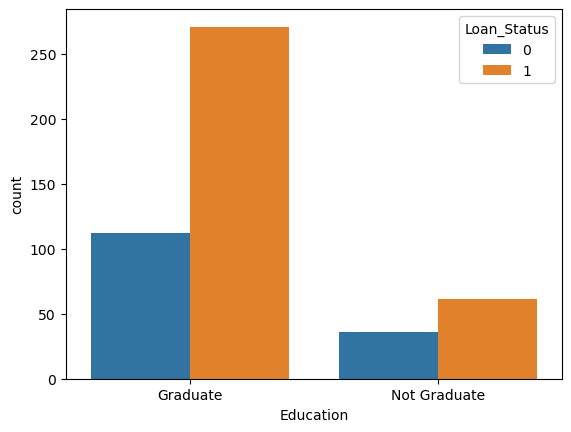

In [15]:
# Education and loan status 
#seaborn library
sns.countplot(x = 'Education', hue = 'Loan_Status',data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

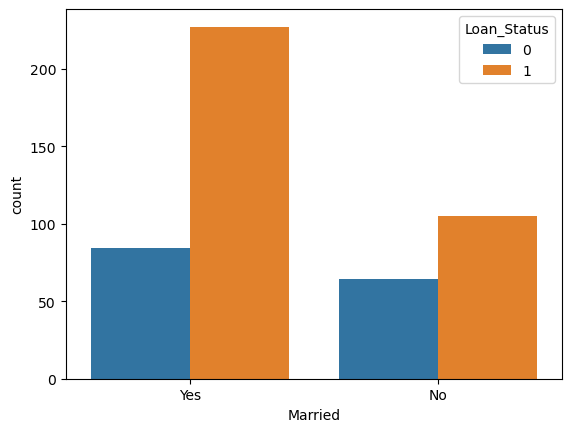

In [16]:
# marital status and loan status 
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Dependents', ylabel='count'>

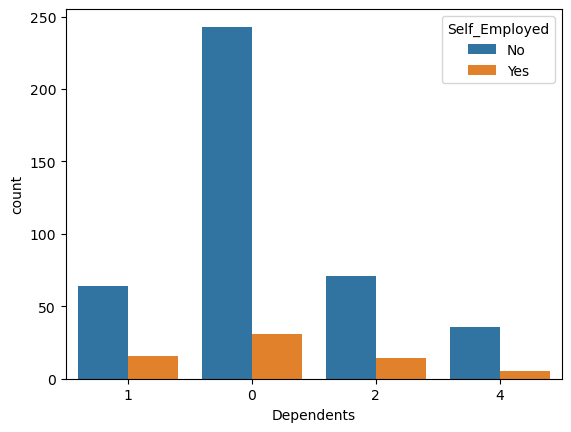

In [17]:
sns.countplot(x = 'Dependents', hue = 'Self_Employed',data = loan_dataset)

convert categorical (like maried or not maried , graduate or not gradeate ) columns to numerical value value

Changed values: Married, Gender, Self_Employed, Property_Area, Education

Previously Changed: Loan_status and dependent

In [18]:
# convert catogorical columns to numerical values 
a = loan_dataset.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'No':0, 'Yes':1}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace = True)

In [19]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [20]:
print(loan_dataset['LoanAmount'].min())

9.0


In [21]:
print(loan_dataset['LoanAmount'].max())

600.0


In [22]:
print(loan_dataset['Loan_Amount_Term'].min())

36.0


In [23]:
print(loan_dataset['Loan_Amount_Term'].max())

480.0


In [24]:
loan_dataset['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [25]:
# Separating the data and label
x = loan_dataset.drop(columns =['Loan_ID', 'Loan_Status'], axis = 1)
y = loan_dataset['Loan_Status']

In [26]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split 
In thsi we are going to split the Train data and Test split data 
x_train  = train data 
y_train = label

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify = y,random_state = 3)
 # all the data for the train data is stored in x_train and the labels that is Loan_Status (y) of that is in y_train and for test also the same 
 # why are we using stratify = y random_state = 2 this wil ensure that not more 0 or 1 are stored in train and test dat both are stored equally
  

In [28]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (432, 11) (48, 11)


In [29]:
y_train

220    0
581    0
329    1
494    0
288    1
      ..
186    0
420    1
568    0
269    1
328    0
Name: Loan_Status, Length: 432, dtype: int64

Training the model:
Support vector machine Model

SVC: Support Vector Classifier

In [30]:
classifier = svm.SVC(kernel='linear')
# classifier = DecisionTreeClassifier()

In [31]:
#train the support vector machine model
classifier.fit(x_train, y_train)
# import pickle 
# pickle.dump(classifier,open('model.pkl','wb'))
import joblib
joblib.dump(classifier,'loanelipri')

['loanelipri']

In [32]:
print(x_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
220       1        1          0          1              0             2221   
581       1        0          0          1              0             1836   
329       0        0          0          1              0             2500   
494       1        1          0          1              0             3597   
288       0        0          0          1              0             4124   
..      ...      ...        ...        ...            ...              ...   
186       1        1          1          1              1             2178   
420       1        1          0          1              0             5829   
568       0        0          0          1              0             2378   
269       0        0          1          1              0             2876   
328       0        1          0          1              0             4333   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Accuracy of our model


In [33]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [34]:
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  0.7986111111111112


In [35]:
x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [36]:
print('Accuracy on testing data: ',testing_data_accuracy)

Accuracy on testing data:  0.7916666666666666


In [ ]:
# get user input for prediction

print("Enter the following information to check your eligibility for a loan:")
Gender = input("What is your gender? (male or female): ")
if Gender == "male":
    Gender = 1
elif Gender == "female":
    Gender = 0
else:
    print("Invalid input for marital status")
print(Gender)

married = input("Are you married? (Yes or No): ").title()
if married == "Yes":
    married = 1
elif married == "No":
    married = 0
else:
    print("Invalid input for marital status")
    # exit()
print(married)

dependents = input("How many dependents do you have? (0-4): ")
if dependents.isdigit() and 0 <= int(dependents) <= 4:
    dependents = int(dependents)
else:
    print("Invalid input for number of dependents")
    # exit()
print(dependents)

education = input("Are you a graduate? (Yes or No): ").title()
if education == "Yes":
    education = 1
elif education == "No":
    education = 0
else:
    print("Invalid input for education level")
    # exit()
print(education)

self_employed = input("Are you self-employed? (Yes or No): ").title()
if self_employed == "Yes":
    self_employed = 1
elif self_employed == "No":
    self_employed = 0
else:
    print("Invalid input for self-employment status")
    # exit()
print(self_employed)

applicant_income = input("What is your monthly applicant_income? (in dollars): ")
if applicant_income.isdigit():
    applicant_income = int(applicant_income)
else:
    print("Invalid input for applicant_income")
    # exit()
print(applicant_income)

coapplicant_income = input("What is your monthly coapplicant_income? (in dollars): ")
if coapplicant_income.isdigit():
    coapplicant_income = int(coapplicant_income)
else:
    print("Invalid input for coapplicant_income")
    # exit()
print(coapplicant_income)

loan_amount = input("What is the loan amount you are applying for? (in thousands of dollars from 9 to 600): ")
if loan_amount.isdigit():
    loan_amount = int(loan_amount)
else:
    print("Invalid input for loan amount")
    # exit()
print(loan_amount)

loan_amount_term = input("What is the loan term you are applying for? (in months from 36 to 480): ")
if loan_amount_term.isdigit():
    loan_amount_term = int(loan_amount_term)
else:
    print("Invalid input for loan term")
    # exit()
print(loan_amount_term)

credit_history = input("Do you have a credit history? (1 or 0): ").title()
if credit_history == "1":
    credit_history = 1
elif credit_history == "0":
    credit_history = 0
else:
    print("Invalid input for credit history")
    # exit()
print(credit_history)

property_area = input("What type of property do you live in? (Rural, Semiurban, Urban): ").title()
if property_area == "Rural":
    property_area = 0
elif property_area == "Semiurban":
    property_area = 1
elif property_area == "Urban":
    property_area = 2
else:
    print("Invalid input for property area")
    # exit()
print(property_area)


Enter the following information to check your eligibility for a loan:


In [ ]:

# input_data = (1,1,4,1,0,3036,2504,158,360,0,1)
# print(type(input_data))
# # Changing the input_data as numpy array
# input_as_numpy_array = np.asarray(input_data)
# print(type(input_as_numpy_array))
# # Reshape the np array as we are predictingfor one instance 
# input_data_reshaped = input_as_numpy_array.reshape(1, -1)

# prediction = classifier.predict(input_data_reshaped)
# if prediction[0]==1:
#   print('Your Eligible of loan')
# else:
#   print('Your not Eligible for Loan')      
# print(prediction)

In [ ]:
input_data = (Gender, married, dependents, education, self_employed, applicant_income, coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area)
input_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_as_numpy_array.reshape(1, -1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)
if prediction[0] == 1:
    print("Congratulations! You are eligible for the loan.")
else:
    print("Sorry, you are not eligible for the loan.")
